# Dependency usage

This notebook shows the distribution of dependencies by version

In [109]:
data_table_file = "~/Downloads/wqyoY.xlsx"

In [110]:
import pandas as pd
import warnings

# reason behind the warning filter: https://stackoverflow.com/a/66749978
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df = pd.read_excel(data_table_file,engine="openpyxl")

In [111]:
df_by_gav = df[['version', 'groupId', 'artifactId']].groupby(by = ['version', 'groupId', 'artifactId'])['version'].count().sort_values(ascending=False).reset_index(name='count')
df_by_gav['groupArtifact'] = df_by_gav[['groupId','artifactId']].apply(':\n'.join, axis=1)
df_by_gav = df_by_gav.drop(columns=['groupId', 'artifactId'])
df_by_gav = df_by_gav.set_index(['groupArtifact','version'], drop = True).sort_values(by = 'version').unstack('version')

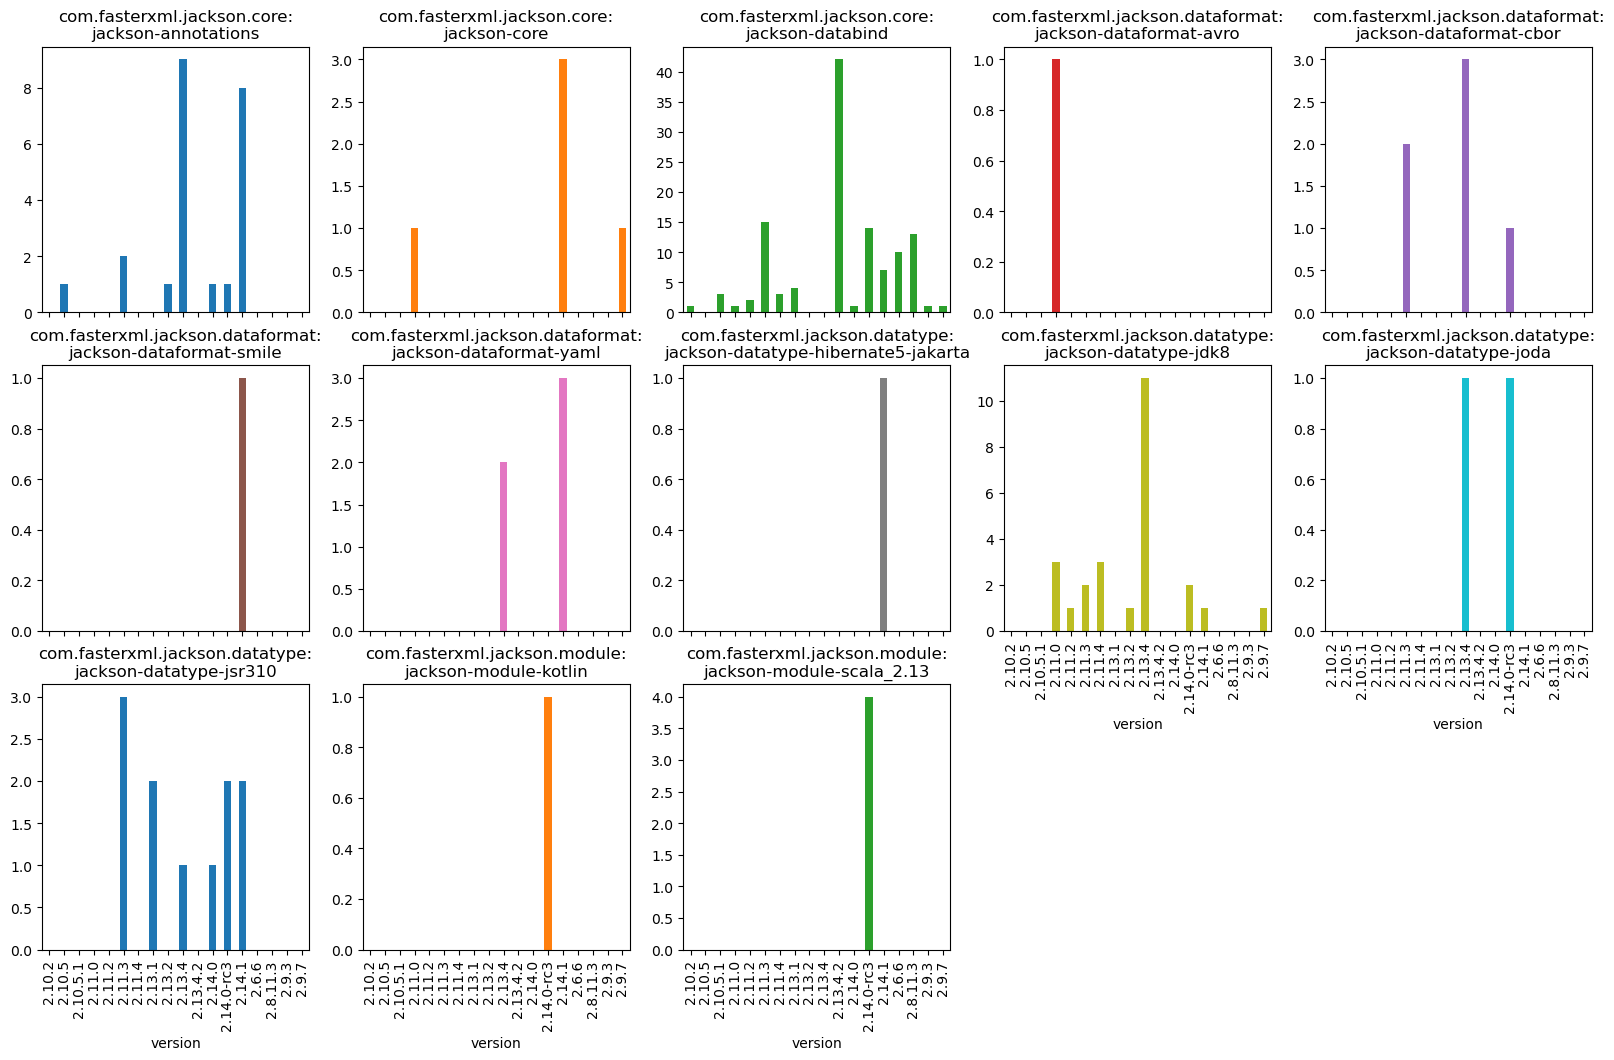

In [127]:
plot = df_by_gav.T.droplevel(0).plot.bar(subplots=True, figsize=(20, 20), layout=(5,5), legend=False)